#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!gdown 1tA4lT8i-_AkakzGcEjbeLTQ9Dmkfz6Pp

Downloading...
From: https://drive.google.com/uc?id=1tA4lT8i-_AkakzGcEjbeLTQ9Dmkfz6Pp
To: /content/Salaries.csv
100% 16.2M/16.2M [00:00<00:00, 79.1MB/s]


In [150]:
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [151]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1st Task

In [152]:
num_rows, num_columns = df.shape
print(f"The dataFrame has {num_rows} rows and {num_columns} columns.")

The dataFrame has 148654 rows and 13 columns.


In [153]:
print("Data type of each column:", df.dtypes)

Data type of each column: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [154]:
print("The number of missing values in each column:", df.isnull().sum())

The number of missing values in each column: Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2nd Task

In [155]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [156]:
print('Mode of total pay:', df['TotalPay'].mode()[0])

Mode of total pay: 0.0


In [157]:
print("Median of total pay:", df['TotalPay'].median())

Median of total pay: 71426.60999999999


In [158]:
print('Range of total pay:', df['TotalPay'].max() - df['TotalPay'].min())

Range of total pay: 568213.56


# 3rd Task

No need to handle missing values in Notes and Status because all the rows are empty, so there's no way to approximate the missing values

In [159]:
df['BasePay'].fillna(df['BasePay'].mode()[0], inplace=True)

We only have 609 missing values out of 148,654 rows so it's safe to replace them with the mode of BasePay.

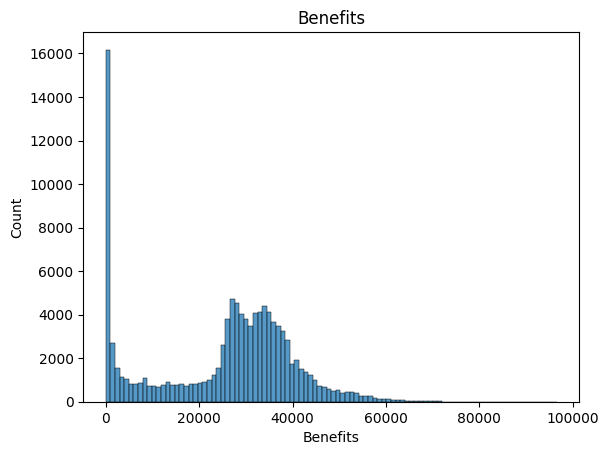

In [161]:
sns.histplot(df['Benefits'])
plt.title('Benefits')
plt.show()

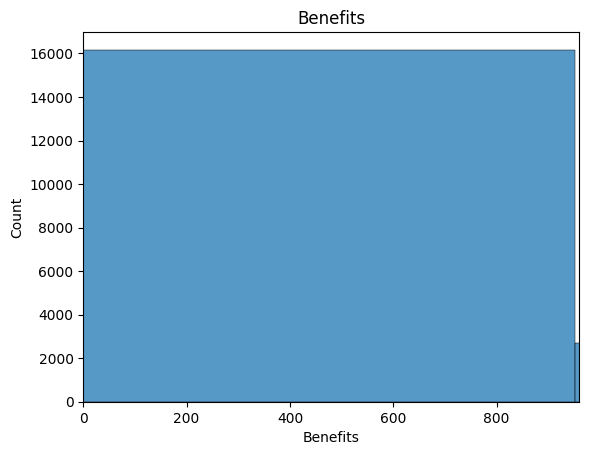

In [162]:
sns.histplot(df['Benefits'])
plt.title('Benefits')
plt.xlim(0, 960)
plt.show()

The values 0-950 follow a uniform distribution.

In [163]:
missing_values_mask = df['Benefits'].isnull()

num_missing_values = missing_values_mask.sum()

random_values = np.random.uniform(0, 950, num_missing_values)

df.loc[missing_values_mask, 'Benefits'] = random_values

A lot of values are 0-950 so it's nearly safe to assume that will be the case with the missing values too so I sampled from a uniform distribution with a range between 0-950 and fill in the missing values.

# 4th Task

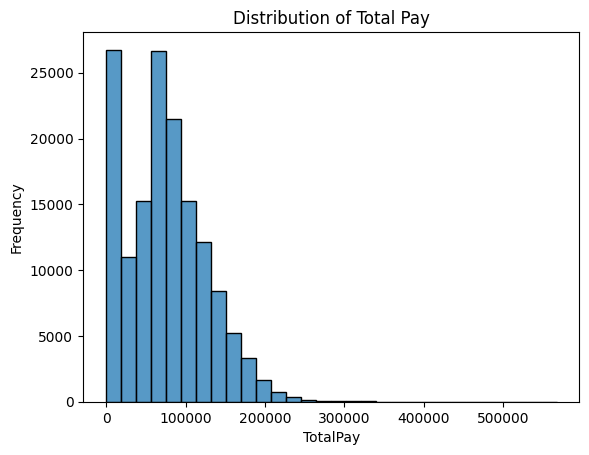

In [172]:
sns.histplot(df['TotalPay'], bins=30)
plt.title('Distribution of Total Pay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

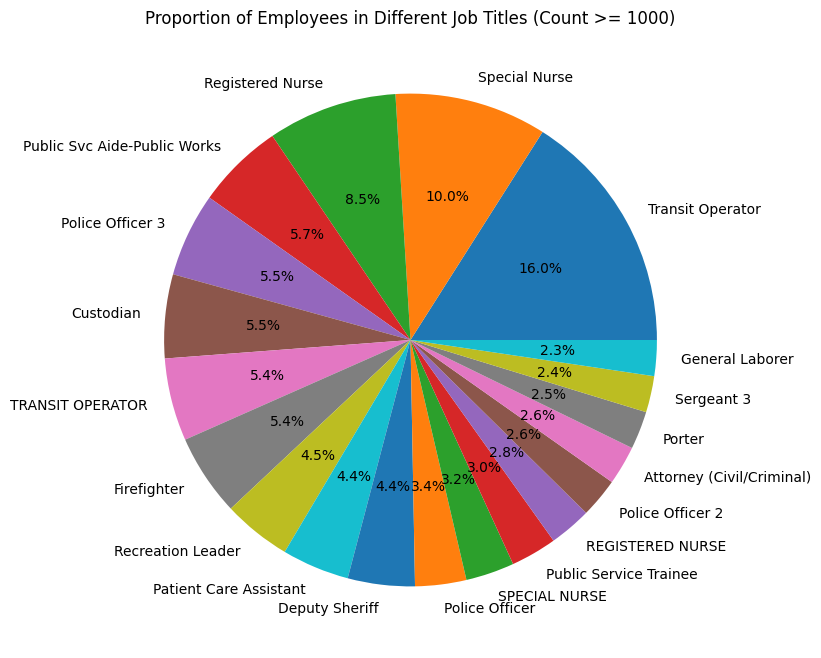

In [165]:
job_title_counts = df['JobTitle'].value_counts()

threshold = 1000

filtered_job_titles = job_title_counts[job_title_counts >= threshold]

plt.figure(figsize=(8, 8))
plt.pie(filtered_job_titles, labels=filtered_job_titles.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Job Titles (Count >= {})'.format(threshold))
plt.show()

There are a lot of departments so I chose a threshold of 1000.

# 5th Task

In [170]:
grouped_summary = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()

sorted_summary = grouped_summary.sort_values(by='mean', ascending=False)

sorted_summary.head()

,JobTitle,count,mean,median,min,max,std
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2,399211.275000,399211.275,230827.12,567595.43,238131.155690
466,Chief Investment Officer,1,339653.700000,339653.700,339653.70,339653.70,NaN
474,Chief of Police,3,329183.646667,326716.760,321552.11,339282.07,9118.772821
475,"Chief, Fire Department",3,325971.683333,326233.440,314759.60,336922.01,11083.523432
586,DEPUTY DIRECTOR OF INVESTMENTS,1,307899.460000,307899.460,307899.46,307899.46,NaN


In [171]:
sorted_summary.tail()

,JobTitle,count,mean,median,min,max,std
499,"Commissioner 16.700c, No Pay",50,25.76,0.0,0.0,1288.0,182.150707
975,IS Technician Assistant,1,0.00,0.0,0.0,0.0,NaN
1274,Not provided,4,0.00,0.0,0.0,0.0,0.000000
1538,Public Safety Comm Tech,1,0.00,0.0,0.0,0.0,NaN
661,Drug Court Coordinator,1,0.00,0.0,0.0,0.0,NaN


# 6th Task

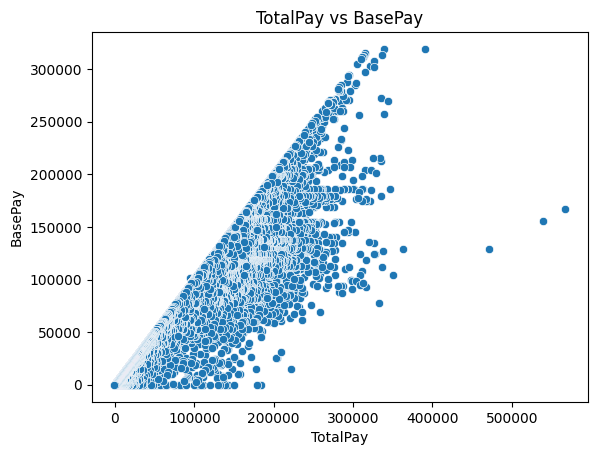

In [168]:
sns.scatterplot(x='TotalPay', y='BasePay', data=df)
plt.title('TotalPay vs BasePay')
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.show()

# 7th Task

1. Distribution of TotalPay is **bi-modal.**

2. **Transit Operator** has the highest number of employees.

3. **GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, Chief Investment Officer** and **Chief of Police** have the highest total pay, while **Drug Court Coordinator, Public Safety Comm Tech** and **IS Technician Assistant** have the lowest total pay.

4. There's a **linear** relationship between TotalyPay vs BasePay.